Importation of modules

In [1]:
#Install packages/modules 

#!pip install plotly

In [2]:
import pandas as pd

#Import visualization module
import matplotlib.pyplot as plt 
from matplotlib import style
style.use("ggplot")

import seaborn as sns 
import plotly.graph_objs as go 
import numpy as np 

#Logistic regression 
from sklearn.linear_model import LogisticRegression

#Sklearn 
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

#Preprocessing
from sklearn.preprocessing import LabelEncoder

#Accuracy test
from sklearn.metrics import accuracy_score

#import warning module to stop showing modules 
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
#features_train, features_test, labels_train, labels_test = train_test_split(word_data, authors, test_size=0.1, random_state=42)

# Import data

In [4]:
data = pd.read_excel('netflix_titles.xls')

In [5]:
#DDisplay read csv dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,0.03,NaN,"Jo√£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demi√°n Bichir, H√©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Data types of each columns 
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
#get null and type 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# columns that have missing data
data.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [9]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
#Get value count of each column
data.groupby(["director", "type"])["type"].nunique()

director               type 
A. L. Vijay            Movie    1
A. Raajdheep           Movie    1
A. Salaam              Movie    1
A.R. Murugadoss        Movie    1
Aadish Keluskar        Movie    1
                               ..
√áagan Irmak           Movie    1
√çsold Uggad√≥ttir     Movie    1
√ìskar Th√≥r Axelsson  Movie    1
√ñmer Faruk Sorak      Movie    1
≈ûenol S√∂nmez         Movie    1
Name: type, Length: 4086, dtype: int64

In [11]:
#Get columns 
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
#Get shape of data 
data.shape

(7787, 12)

In [13]:
#Get dataset summary
data.describe()

"""This is unecessary since the dataset is composed of non-numerical figures"""

'This is unecessary since the dataset is composed of non-numerical figures'

# Data Preprocessing

How to handle the missing data -  Remove the null values, the dataset is mostly composed of non-numerical values.

In [14]:
#Get total of null values 
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
#Creating new data with no null values  
data_two = data.dropna()

In [16]:
#Test for null values existence 
data_two.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
# Check for duplicate
data_two.duplicated().sum()

0

In [18]:
#function that clean up data 

def cleanData(data):
    #remove null values
    data_two = data.dropna()
        
    #return new dataframe
    return data_two
   
print(cleanData(data))

#Confirm if null values have been removed 
data_two.isna().sum()

     show_id     type       title           director  \
1         s2    Movie    07:19:00  Jorge Michel Grau   
2         s3    Movie    23:59:00       Gilbert Chan   
3         s4    Movie           9        Shane Acker   
4         s5    Movie          21     Robert Luketic   
5         s6  TV Show          46        Serdar Akar   
...      ...      ...         ...                ...   
7778   s7779    Movie  Zombieland    Ruben Fleischer   
7780   s7781    Movie         Zoo       Shlok Sharma   
7781   s7782    Movie        Zoom       Peter Hewitt   
7782   s7783    Movie        Zozo        Josef Fares   
7783   s7784    Movie      Zubaan        Mozez Singh   

                                                   cast  \
1     Demi√°n Bichir, H√©ctor Bonilla, Oscar Serrano...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
5     Erdal Be≈üik√ßioƒülu, Yase

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
data_two.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demi√°n Bichir, H√©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Be≈üik√ßioƒülu, Yasemin Allen, Melis Bir...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


Create new columns by extracting year

In [20]:
data_two['year_added'] = data_two.loc[:, 'date_added'].apply(lambda x: x.split(" ")[-1])

data_two['year_added'].head(10)

1     2016
2     2018
3     2017
4     2020
5     2017
6     2020
7     2019
8     2019
9     2017
10    2017
Name: year_added, dtype: object

In [21]:
data_two.date_added.head()

1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
5         July 1, 2017
Name: date_added, dtype: object

In [22]:
#Create new columns by extracting year

data_two['month_added'] = data_two.loc[:, 'date_added'].apply(lambda x: x.split(" ")[-3])

data_two.month_added.head(10)

1     December
2     December
3     November
4      January
5         July
6         June
7     November
8        April
9     December
10     October
Name: month_added, dtype: object

In [23]:
#Confirming if the new colmns were added 
data_two.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

Replace movies and TV Shows and Movies with 0 and 1 

In [24]:
data_two.replace(['Tv Show', 'Movies'], [0, 1]).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demi√°n Bichir, H√©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January
5,s6,TV Show,46,Serdar Akar,"Erdal Be≈üik√ßioƒülu, Yasemin Allen, Melis Bir...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,July


# Data Visualization 

Noteable difference by country 

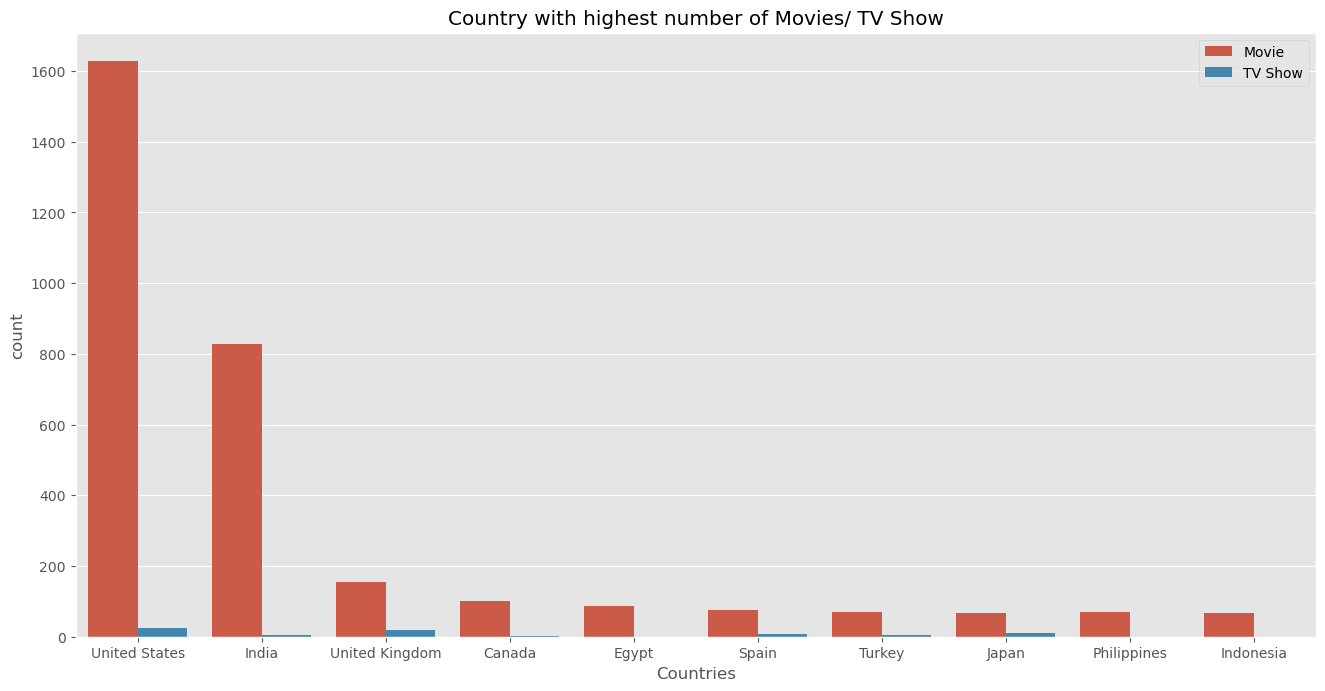

In [25]:
#determine size of visualization output 
plt.figure(figsize=(16, 8), dpi = 100)

# Plot 
sns.countplot(x = "country", data=data_two, order=data_two.country.value_counts()[:10].index, hue="type")

# Create title 
plt.title('Country with highest number of Movies/ TV Show')
plt.xlabel('Countries')

# Visualize the plot
plt.legend(loc = 1)
plt.show()

<p><b>Conclusion:</b> United Stated has the largest viewership followed by India and United Kingdom</p>

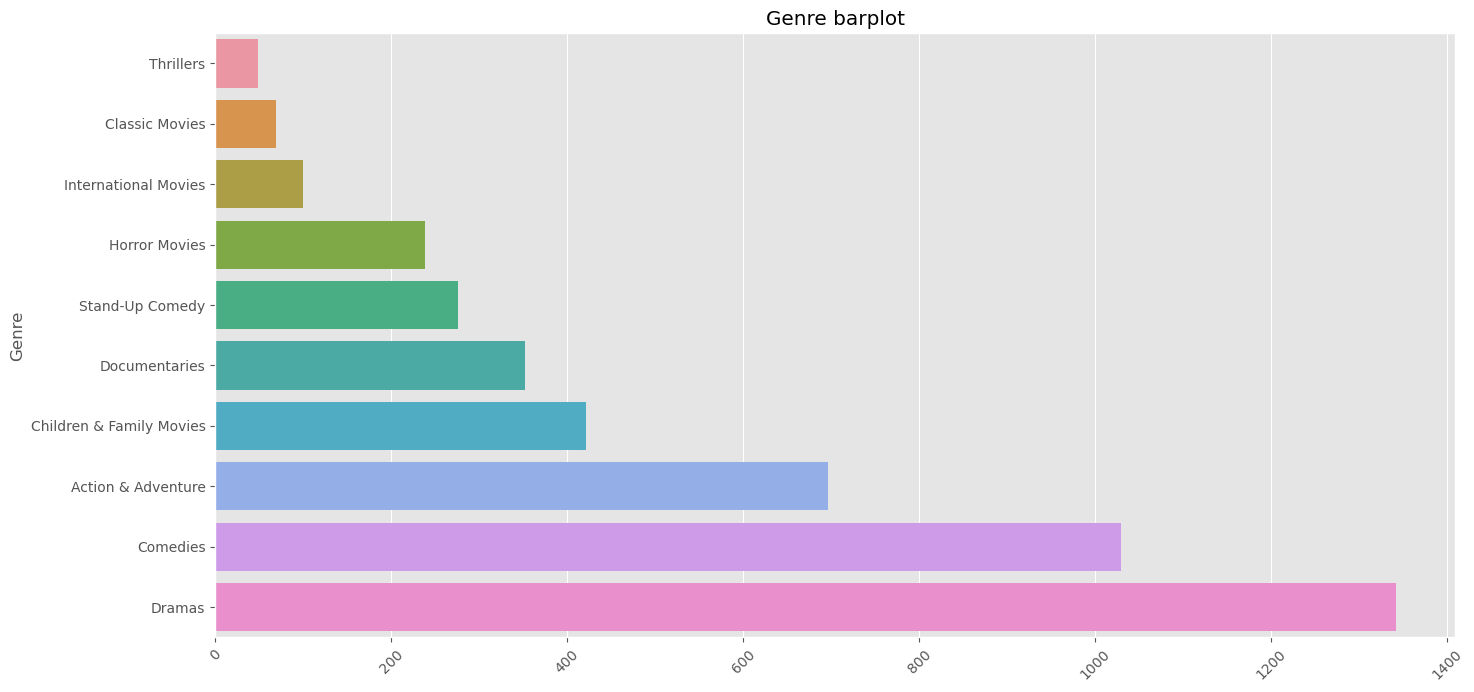

In [26]:
#Determine size of the visual 
plt.figure(figsize=(16, 8), dpi = 100)

#Rename column kisted_in to genre
data_two = data_two.rename(columns={"listed_in": "genre"})

#Slpit the renamed column to get genre
data_two.genre = data_two.genre.apply(lambda x: x.split(", ")[0])

#Plot
sns.barplot(y=data_two.genre.value_counts()[:10].sort_values().index, x=data_two.genre.value_counts()[:10].sort_values().values)

#Visualize data
plt.title('Genre barplot')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()

<p><b>Conclusion:</b> United Stated has the largest viewership followed by India and United Kingdom</p>

Genre that have gotten less / more popular

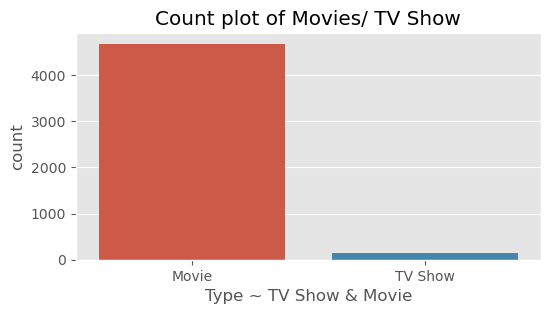

In [27]:
#determine size of visualization output 
plt.figure(figsize=(6, 3), dpi = 100)

#categorical plot 
sns.countplot(x ='type', data = data_two)

# Create title 
plt.title('Count plot of Movies/ TV Show')
plt.xlabel('Type ~ TV Show & Movie')
# Visualize the plot
plt.show()

<p><b>Conclusion:</b> Movies have gotten more popular than TV shows</p>

Is Netflix investing in TV shows/ Movies 

In [28]:
#determine size of visualization output 
plt.figure(figsize=(8, 8), dpi = 100)

#Plot & defining 
df_movie = data_two[data_two.type =='Movie'].groupby('release_year').count()

df_tv = data_two[data_two.type =='TV Show'].groupby('release_year').count()


df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)


# trend of movies and tv shows in recent year (from 1930 to 2020)
visual = go.Figure()
visual.add_trace(go.Scatter(x = df_movie.release_year, y = df_movie.type,
                    mode='lines',
                    name='Movies', marker_color='red'))

visual.add_trace(go.Scatter(x=df_tv.release_year, y=df_tv.type,
                    mode='lines',
                    name='TV Shows', marker_color='green'))

#Create titles
visual.update_layout(title_text='Trend Movies vs TV Shows in recent years',
                     xaxis_title="Year",
                     yaxis_title = 'Number of movies produced',
                     title_x=0.5)

# Visualize the plot
visual.show()

<Figure size 800x800 with 0 Axes>

<b> Conclusion: </b> <p> Netflix is investing in movies this is evident in the trend, each year netflix is releasing movies than TV shows </p>

Number of movies/ Tv Shows produced each month

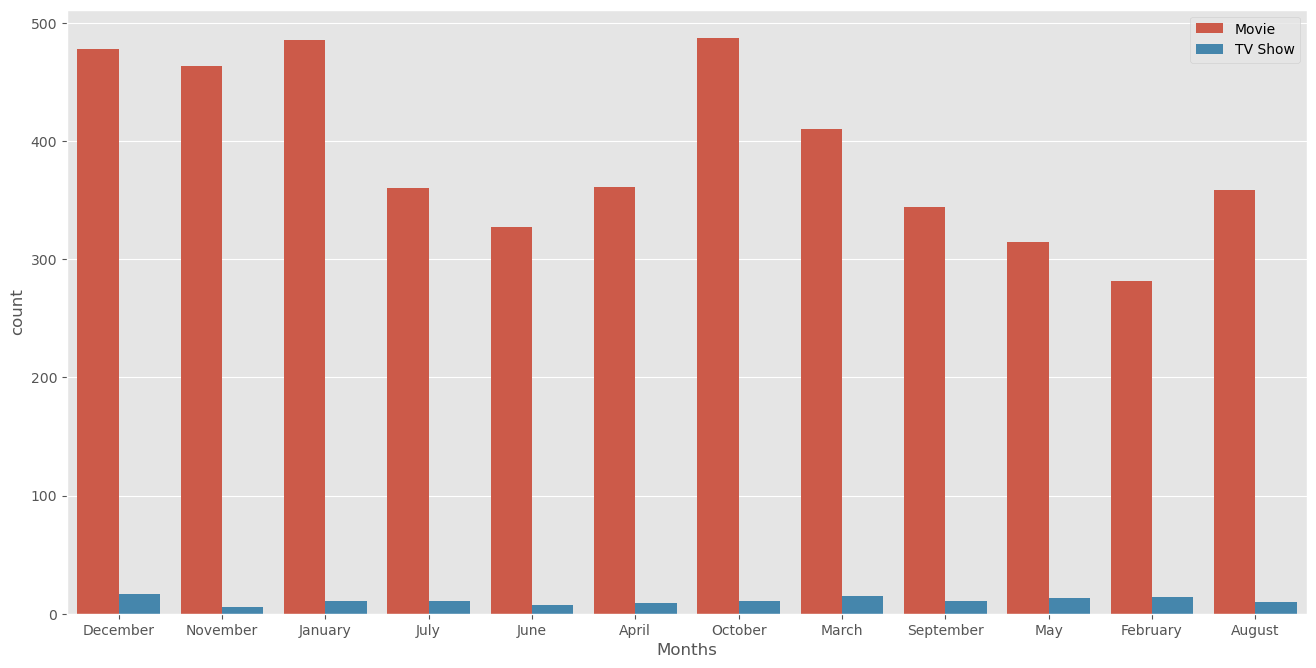

In [29]:
#determine size of visualization output 
plt.figure(figsize=(16, 8), dpi = 100)

#Plot & defining 
sns.countplot(x = "month_added", data=data_two, hue="type")

#Titles 
plt.xlabel('Months')

plt.legend(loc = 1)
plt.show()

<p><b>Conclusion:</b>Movies are produced mostly in the month of  October ,  January and December.</p>


Trends in the length of movies 

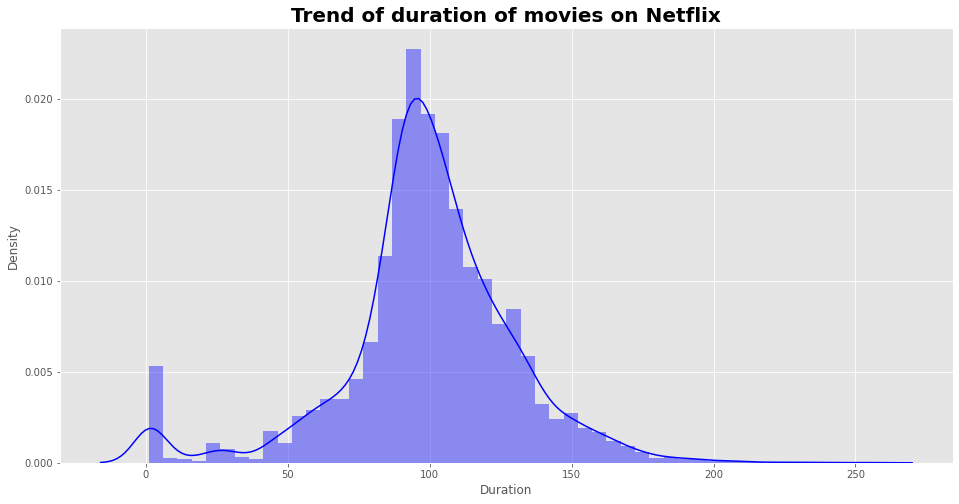

In [30]:
#Set size of visualization output
plt.figure(figsize = (16,8))

#Split column duration to get number of minutes only
data_two.minutes = data_two.duration.apply(lambda x : x.split(" ")[-2])

#Plot using seaborn 
sns.distplot(data_two.minutes, color = 'blue')

#Create labels for tittle and X-axis
plt.title('Trend of duration of movies on Netflix', fontsize = 20, fontweight = 'bold')
plt.xlabel('Duration')

#Visualize plot
plt.show()

<p> <b>Conclusion:</b> Majorities movies produced have a range of between 85 minutes to 120 minutes</p>

Trends in the number of seasons in TV shows 

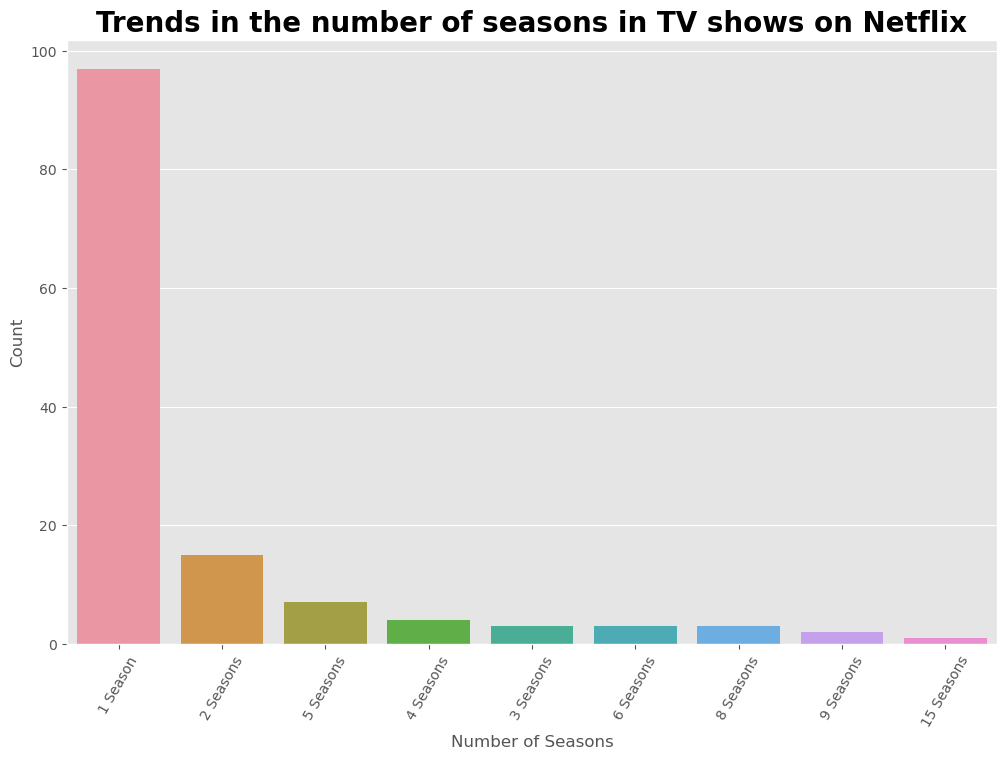

In [31]:
#Define size of the visualization
plt.figure(figsize = (12,8), dpi = 100)



#Getting TV Shows seasons onlines 
tv_dFrame = data_two[data_two.type == 'TV Show']

data_three = tv_dFrame.groupby(['duration'])['show_id'].count().reset_index().rename(columns = {'index' : 'Duration' , 'show_id' : 'Count'}).sort_values(['Count'] , ascending = False)

# Plot
sns.barplot(x = 'duration' , y = 'Count' , data = data_three)

# Labelling 
plt.title('Trends in the number of seasons in TV shows on Netflix', size = 20, fontweight = 'bold')
plt.xlabel('Number of Seasons')
plt.xticks(rotation = 60)

# Show visualizaton 
plt.show()

<b> Conclusion: </b> <p> Majority of the seasons consists of 1, 2 and 5 seasons. </p>

Certain directors that netflix seems to like 

In [32]:
#To find unique actors 
data_two.director.unique()

array(['Jorge Michel Grau', 'Gilbert Chan', 'Shane Acker', ...,
       'Peter Hewitt', 'Josef Fares', 'Mozez Singh'], dtype=object)

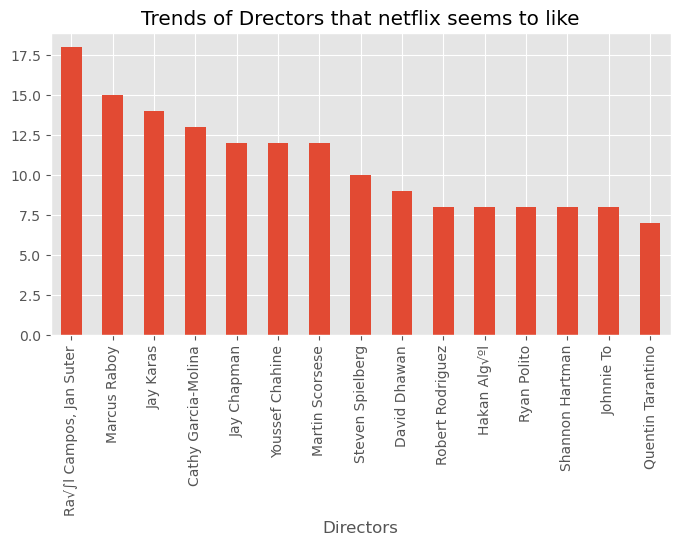

In [33]:
# Detrmine size of the output(visualization)
plt.figure(figsize=(8,4), dpi = 100)

#Plot
director_data = data_two.director.value_counts().head(15)

director_data.plot(kind = 'bar')

# Create labels 
plt.xlabel('Directors')
plt.title('Trends of Drectors that netflix seems to like')

# Show output
plt.show()

<p><b>Conclusion:</b>  Raul Campus, Jan Suter and Marcus Raboy seems to be prefered by Netflix</p>

# <b> MACHINE LEARNING </b>

In [34]:
ml_df = data_two[["year_added" , "type"]]

#checking unie items in the type column 
ml_df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [35]:
#convert the type data into numerical
le = LabelEncoder()
type_encoded = le.fit_transform(ml_df.type)

#print(type_encoded)
ml_df['encoded_type'] = type_encoded

#convert year_added object to numerical 
#ml_df['year_added'] = ml_df['year_added'].astype(int) OR 
ml_df['year_added'] = pd.to_numeric(ml_df['year_added'])
ml_df.head()

,year_added,type,encoded_type
1,2016,Movie,0
2,2018,Movie,0
3,2017,Movie,0
4,2020,Movie,0
5,2017,TV Show,1


In [36]:
ml_df.dtypes

year_added       int64
type            object
encoded_type     int64
dtype: object

LOGISTIC REGRESSION

In [37]:
#create object of Logistic regression 
model = LogisticRegression()

#split dataset to train and split 
X_train, X_test, y_train, y_test = train_test_split(ml_df[['year_added']], ml_df.encoded_type ,test_size=0.1)

#train the dataset 
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
#Test Accuracy of the model
model.score(X_test, y_test)

0.972972972972973

In [40]:
accuracy = accuracy_score(y_test, model.predict(X_test))
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 97.30


In [41]:
#Save model for later use
import pickle 

with open("model_pickle", "wb") as f:
    pickle.dump(model, f)

#use the model
with open("model_pickle", "rb") as f:
    mp = pickle.load(f)

mp.predict([[2017]])


array([0])

ROUGH WORK